In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('fraudTrain.csv')

In [4]:
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
data.shape

(1296675, 23)

In [8]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


<Axes: xlabel='merch_lat', ylabel='Count'>

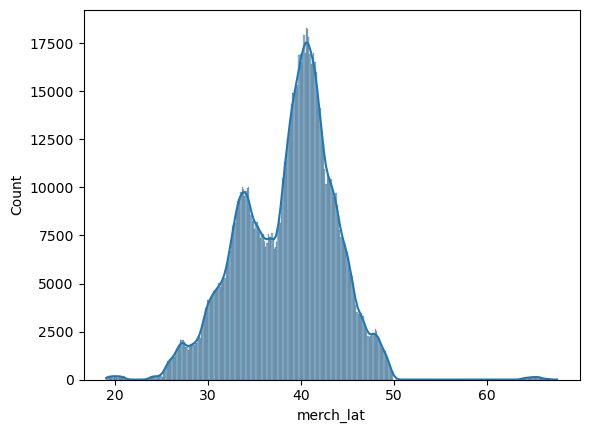

In [10]:
sns.histplot(data['merch_lat'],kde=True)

<Axes: xlabel='merch_long', ylabel='Count'>

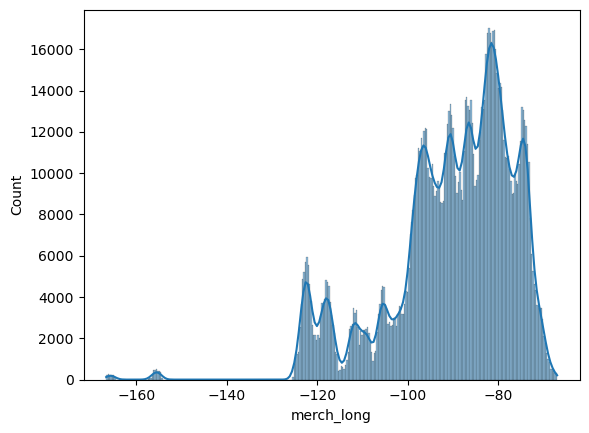

In [11]:
sns.histplot(data['merch_long'],kde=True)

<Axes: xlabel='amt', ylabel='Count'>

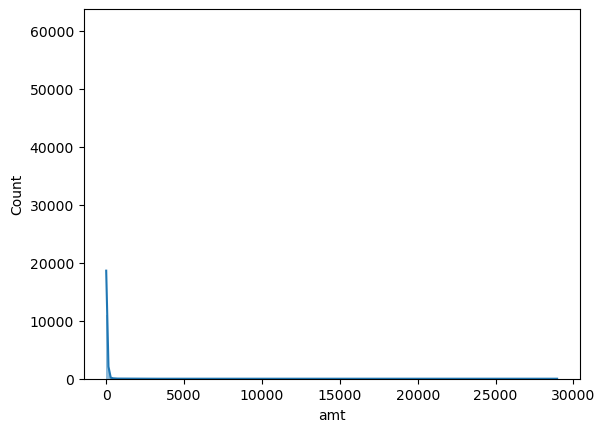

In [12]:
sns.histplot(data['amt'],kde=True)

In [13]:
print("Mean: ",data['amt'].mean())
print("Median: ",data['amt'].median())

Mean:  70.35103545607033
Median:  47.52


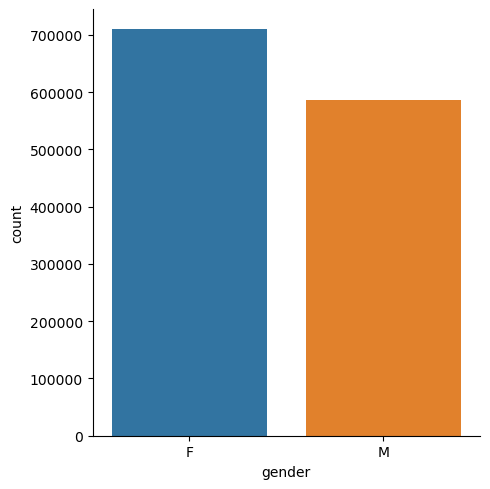

In [14]:
sns.catplot(data=data, x="gender", kind="count")

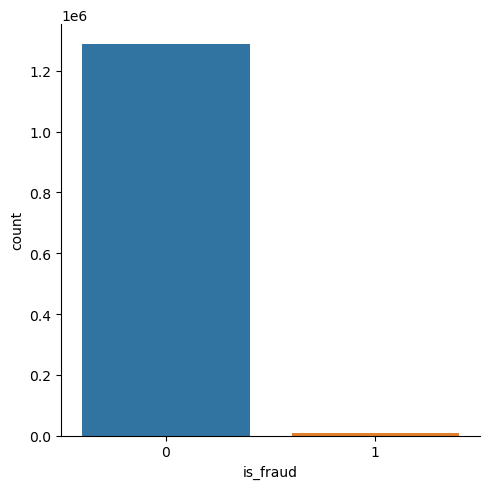

In [15]:
sns.catplot(data=data, x="is_fraud", kind="count")

In [16]:
data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [17]:
percentages_1=data['is_fraud'].value_counts()[0]/sum(data['is_fraud'].value_counts())
percentages_2=data['is_fraud'].value_counts()[1]/sum(data['is_fraud'].value_counts())


In [18]:
print('Percent_of_not_fraud',percentages_1)
print('Percent_of_fraud',percentages_2)

Percent_of_not_fraud 0.9942113482561166
Percent_of_fraud 0.005788651743883394


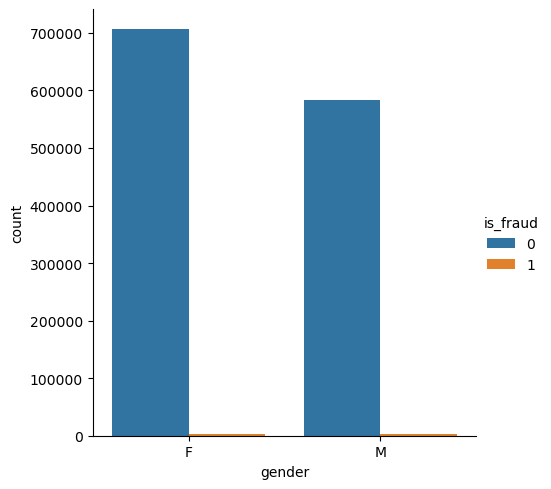

In [19]:
sns.catplot(data=data, x="gender", kind="count",hue='is_fraud')

In [20]:
male_df=data[data['gender']=='M']
fraudulent_males = male_df[male_df['is_fraud'] == 1]
len(fraudulent_males)

3771

In [21]:
female_df=data[data['gender']=='F']
fraudulent_females = female_df[female_df['is_fraud'] == 1]
len(fraudulent_females)

3735

In [22]:
data['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

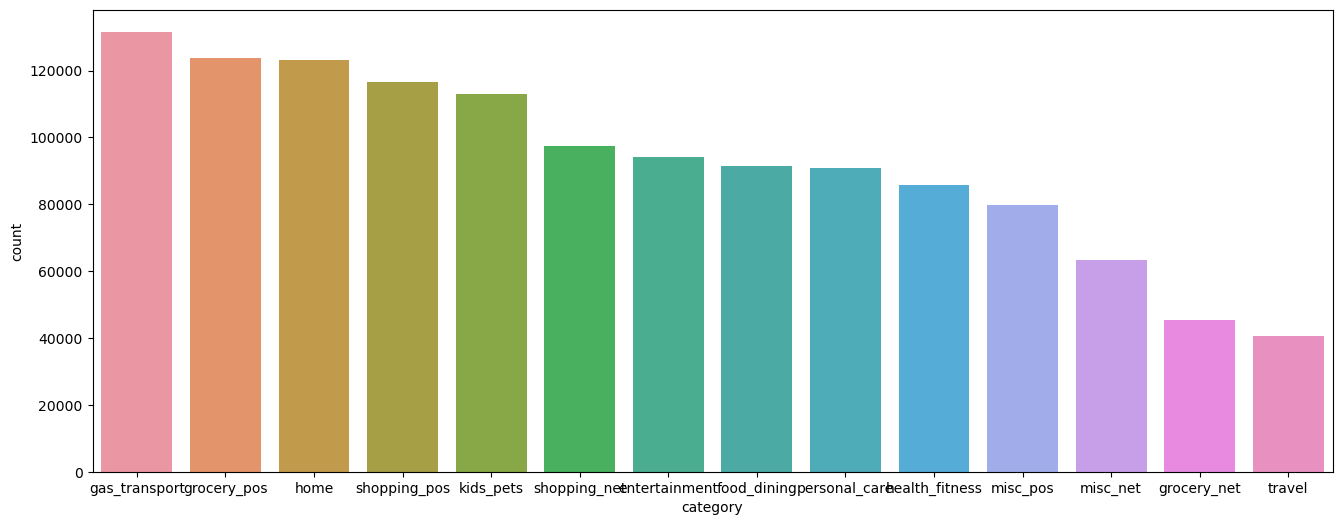

In [23]:
fig=plt.figure(figsize=(16,6))

sns.countplot(data=data,x='category',order=data.category.value_counts(sort=True, ascending=False).index)

In [24]:
data.transaction_time = pd.to_datetime(data.trans_date_trans_time )
data['transaction_date'] = data.transaction_time.dt.strftime('%Y-%m-%d')
data['transaction_hour'] = data.transaction_time.dt.strftime('%H')
data['transaction_month'] = data.transaction_time.dt.strftime('%m')

In [25]:
data['transaction_year']=data.transaction_time.dt.strftime('%Y')

In [26]:
data['transaction_date'].value_counts()

transaction_date
2019-12-08    6428
2019-12-15    6425
2019-12-22    6325
2019-12-29    6320
2019-12-01    6283
              ... 
2019-01-30    1109
2020-01-07    1107
2019-02-27    1106
2020-02-18    1100
2020-01-21    1073
Name: count, Length: 537, dtype: int64

In [27]:
data.dob = pd.to_datetime(data.dob)
data['birthday_date'] = data.dob.dt.strftime('%Y-%m-%d')
data['age'] = (data.transaction_time - data.dob)
data['age']=data['age']/pd.Timedelta('365 days')

In [28]:
data['age']=data['age'].astype(int)

<Axes: xlabel='age', ylabel='Count'>

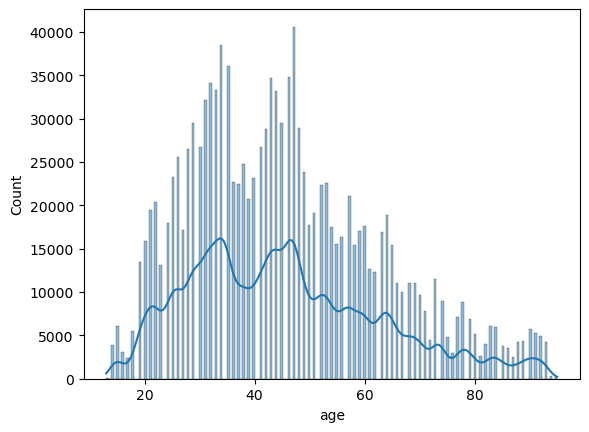

In [29]:
sns.histplot(data['age'],kde=True)

In [30]:
print(data.age.mean())
print(data.age.median())

45.528224111670234
44.0


In [31]:
data['transaction_month'].value_counts()

transaction_month
05    146875
06    143811
03    143789
12    141060
04    134970
01    104727
02     97657
08     87359
07     86596
09     70652
11     70421
10     68758
Name: count, dtype: int64

<Axes: xlabel='transaction_month', ylabel='count'>

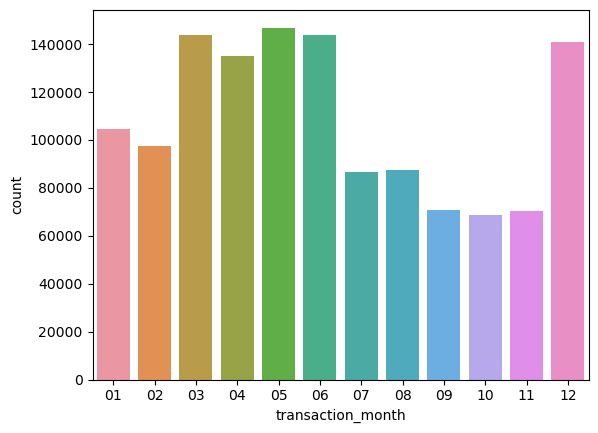

In [32]:
sns.countplot(data=data,x='transaction_month')

In [33]:
def age_interval(x):
    if x < 20:
        return "Less than 20" 
    elif x >=20 and x < 30:
        return "Between 20 and 30"
    elif x >=30 and x < 40:
        return "Between 30 and 40"
    elif x >=40 and x < 50:
        return "Between 40 and 50"
    elif x >=50 and x < 60:
        return "Between 50 and 60"
    else: 
        return "Larger than 60"
data['age_intervals'] = data.age.map(lambda x : age_interval(x))

In [34]:
data['age_intervals'].value_counts()

age_intervals
Between 40 and 50    304187
Between 30 and 40    291408
Larger than 60       272838
Between 20 and 30    208929
Between 50 and 60    184769
Less than 20          34544
Name: count, dtype: int64

In [35]:
df_fraud = data[data.is_fraud==1]

In [36]:
df_fraud['age']

2449       30
2472       58
2523       58
2546       30
2553       58
           ..
1295399    34
1295491    34
1295532    26
1295666    50
1295733    26
Name: age, Length: 7506, dtype: int32

<Axes: xlabel='age', ylabel='Count'>

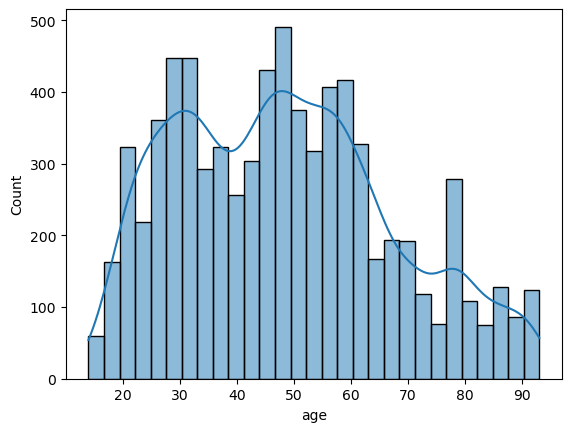

In [37]:
sns.histplot(df_fraud['age'],kde=True)

<Axes: xlabel='gender', ylabel='age'>

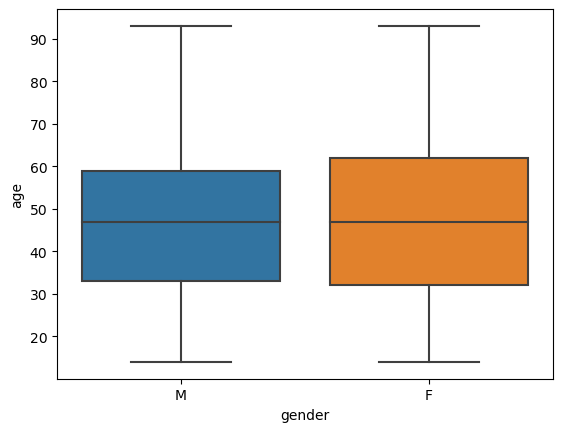

In [38]:
sns.boxplot(data=df_fraud,x='gender',y='age')

<Axes: xlabel='amt', ylabel='Count'>

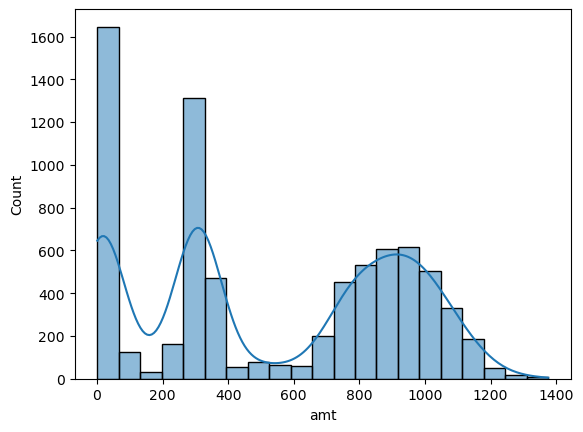

In [39]:
sns.histplot(df_fraud['amt'],kde=True)

<Axes: xlabel='age_intervals', ylabel='count'>

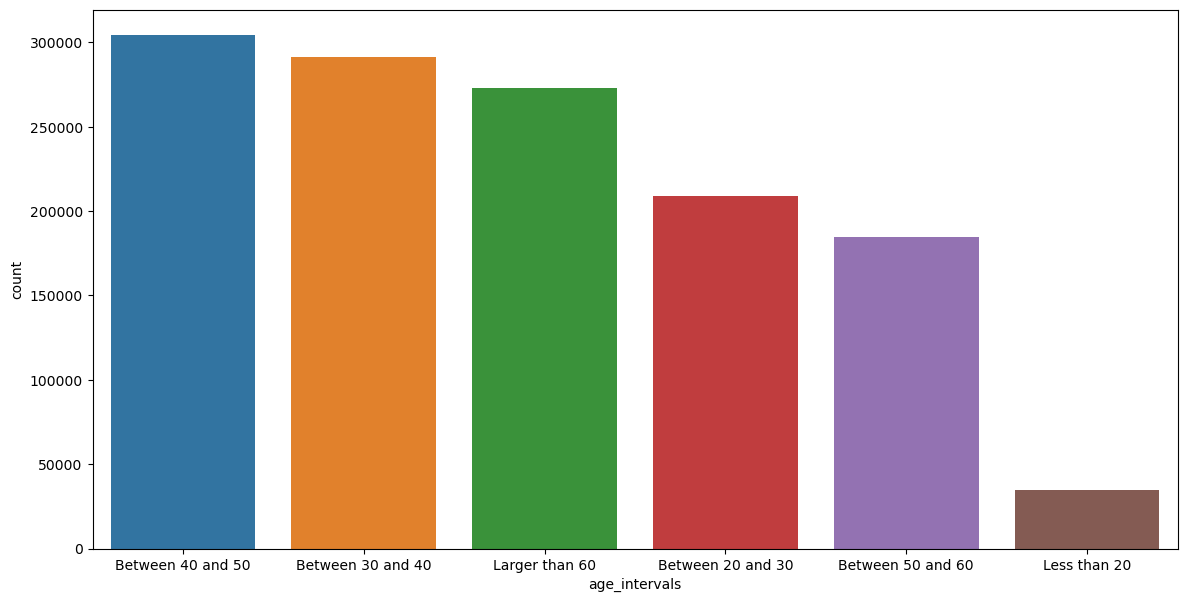

In [40]:
fig=plt.figure(figsize=(14,7))
sns.countplot(data=data,x='age_intervals',order=data.age_intervals.value_counts(sort=True, ascending=False).index)

In [41]:
df_fraud['age_intervals'].value_counts()

age_intervals
Larger than 60       2003
Between 40 and 50    1395
Between 50 and 60    1386
Between 30 and 40    1276
Between 20 and 30    1223
Less than 20          223
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='age_intervals'>

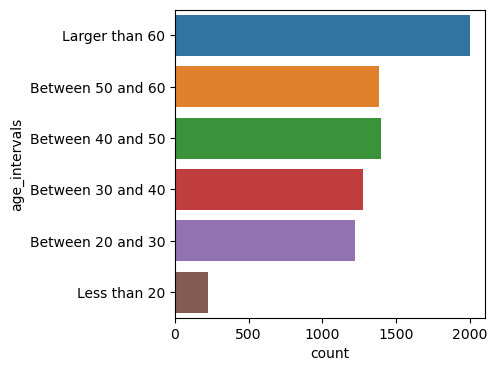

In [42]:
age_order = ['Larger than 60', 'Between 50 and 60', 'Between 40 and 50', 'Between 30 and 40', 'Between 20 and 30', 'Less than 20']
fig=plt.figure(figsize=(4,4))
sns.countplot(data=df_fraud,y='age_intervals',order=age_order)

Text(0.5, 1.05, 'Amount vs Age_interval')

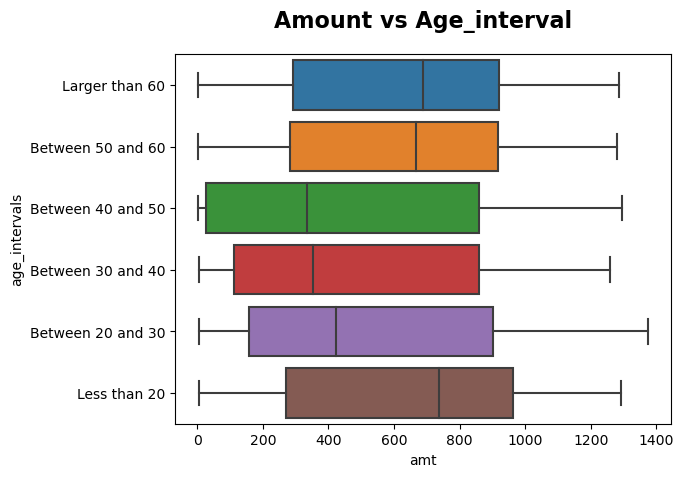

In [43]:
age_order = ['Larger than 60', 'Between 50 and 60', 'Between 40 and 50', 'Between 30 and 40', 'Between 20 and 30', 'Less than 20']
pt=sns.boxplot(data=df_fraud,x='amt',y='age_intervals',order=age_order)
pt.set_title('Amount vs Age_interval', fontsize=16, fontweight='bold', y=1.05)

Text(0.5, 1.05, 'Amount vs Age_Interval vs Gender')

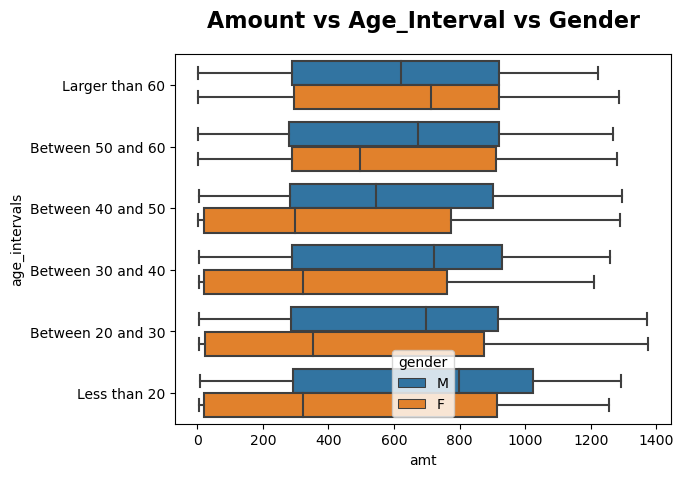

In [44]:
pt=sns.boxplot(data=df_fraud,x='amt',y='age_intervals',hue='gender',order=age_order)
pt.set_title('Amount vs Age_Interval vs Gender', fontsize=16, fontweight='bold', y=1.05)

In [45]:
df_fraud['gender'].value_counts()

gender
M    3771
F    3735
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

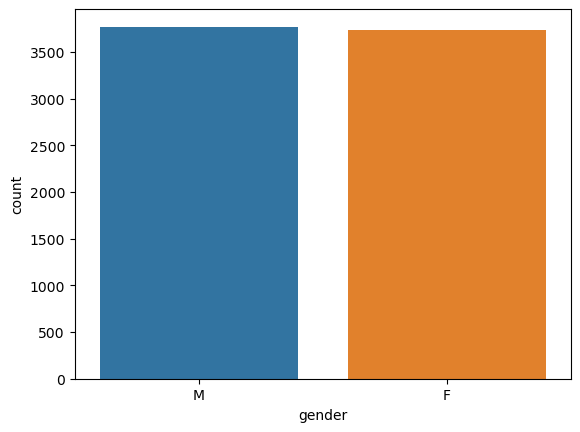

In [46]:
sns.countplot(data=df_fraud,x='gender')

In [47]:
ratio = df_fraud['gender'].value_counts()/sum(df_fraud['gender'].value_counts())
ratio

gender
M    0.502398
F    0.497602
Name: count, dtype: float64

In [48]:
df_fraud['transaction_month'].value_counts()

transaction_month
03    938
05    935
02    853
01    849
06    688
04    678
12    592
10    454
09    418
11    388
08    382
07    331
Name: count, dtype: int64

In [49]:
fraud_month=df_fraud['transaction_month'].value_counts()
fraud_month_df=pd.DataFrame(fraud_month).reset_index()
fraud_month_df
fraud_month_df.rename(columns={'transaction_month':'month','count':'Number of fraud'},inplace=True)
fraud_month_df_sort=fraud_month_df.sort_values('month',ascending=True)

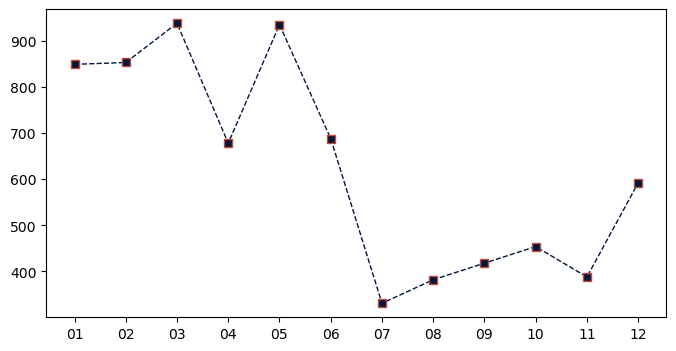

In [50]:
fig = plt.figure(figsize=(8,4))
plt.plot(fraud_month_df_sort.month, 
         fraud_month_df_sort['Number of fraud'],
         linestyle='--', 
         marker="s", 
         color='#00163E', 
         markeredgecolor="#C04C36",
         linewidth=1)


In [51]:
transaction_hour=df_fraud.transaction_hour.value_counts()
transaction_hour_df=pd.DataFrame(transaction_hour).reset_index()
transaction_hour_df
transaction_hour_df.rename(columns={'transaction_hour':'hour','count':'Number of fraud'},inplace=True)

transaction_hour_df_sort=transaction_hour_df.sort_values('hour',ascending=True)

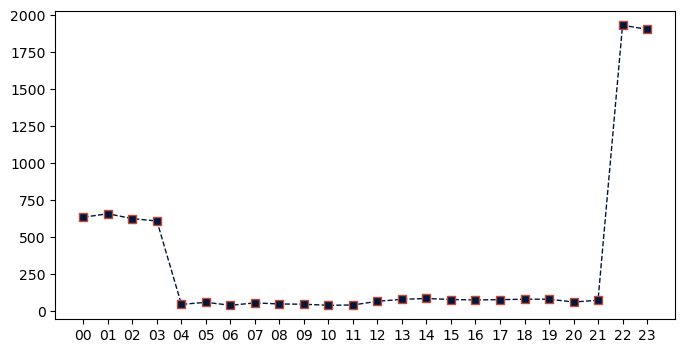

In [52]:
fig = plt.figure(figsize=(8,4))
plt.plot(transaction_hour_df_sort.hour, 
         transaction_hour_df_sort['Number of fraud'],
         linestyle='--', 
         marker="s", 
         color='#00163E', 
         markeredgecolor="#C04C36",
         linewidth=1)


In [53]:
data['city'].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

Text(0.5, 1.05, 'Fraud count vs City vs Gender')

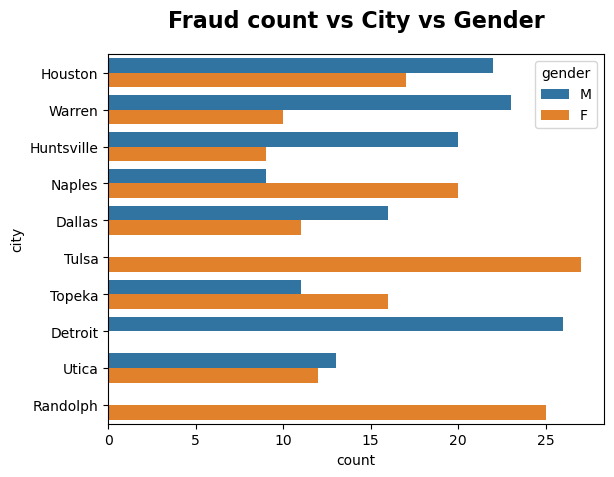

In [54]:
pt=sns.countplot(y = 'city',
                  data=df_fraud, 
                  hue='gender',
                  width=0.8,
                  order=df_fraud.city.value_counts(sort=True, ascending=False).head(10).index)
pt.set_title('Fraud count vs City vs Gender', fontsize=16, fontweight='bold', y=1.05)

In [55]:
df_fraud['category'].value_counts()

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: count, dtype: int64

Text(0.5, 1.05, 'Fraud count vs category vs gender')

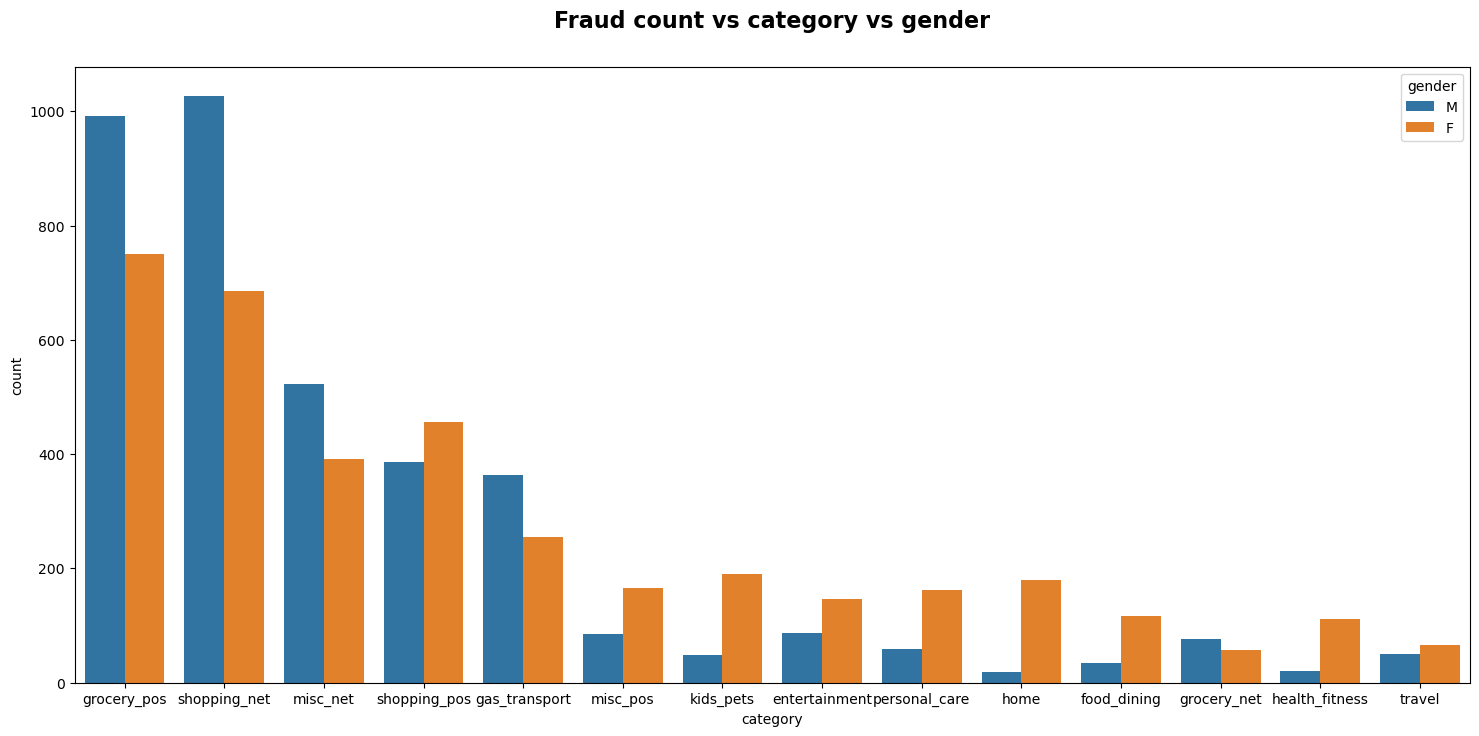

In [56]:
fig=plt.figure(figsize=(18,8))
pt=sns.countplot(data=df_fraud,x='category',hue='gender',order=df_fraud.category.value_counts().index)
pt.set_title('Fraud count vs category vs gender', fontsize=16, fontweight='bold', y=1.05)

In [57]:
data.street.value_counts()[0:10]

street
0069 Robin Brooks Apt. 695           3123
864 Reynolds Plains                  3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
29606 Martinez Views Suite 653       3112
1652 James Mews                      3110
854 Walker Dale Suite 488            3107
40624 Rebecca Spurs                  3106
594 Berry Lights Apt. 392            3101
Name: count, dtype: int64

In [58]:
df_fraud.street.value_counts()[0:5]

street
5205 Annette Islands Apt. 043     19
15315 Vaughn Park Suite 356       19
0374 Courtney Islands Apt. 400    18
474 Allen Haven                   16
537 Rice Square Suite 040         16
Name: count, dtype: int64

<Axes: xlabel='street', ylabel='count'>

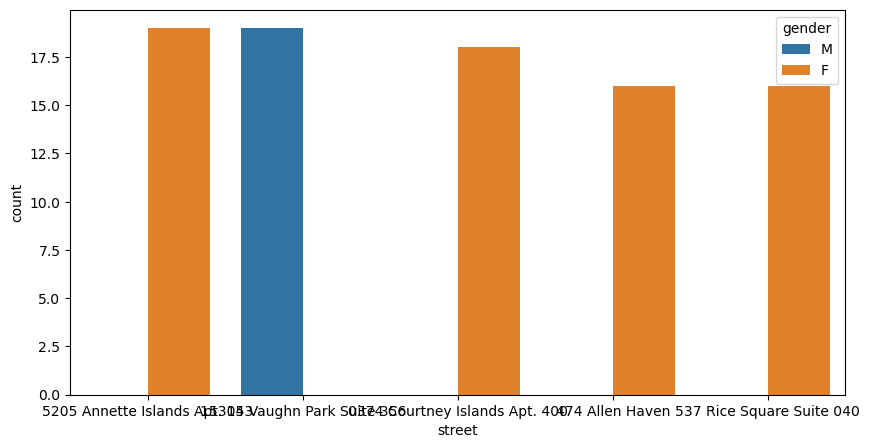

In [59]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=df_fraud,x='street',hue='gender',order=df_fraud.street.value_counts()[0:5].index)

Text(0.5, 1.05, 'Fraud count vs Transaction_year vs Gender')

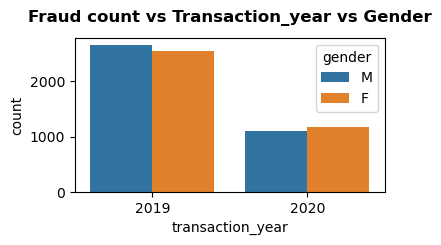

In [60]:
fig=plt.figure(figsize=(4,2))
pt=sns.countplot(data=df_fraud,x='transaction_year',hue='gender')
pt.set_title('Fraud count vs Transaction_year vs Gender', fontsize=12, fontweight='bold', y=1.05)

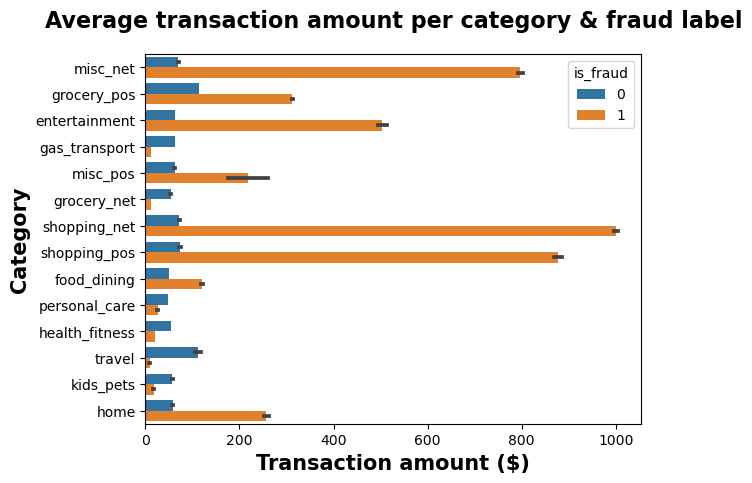

In [61]:
pt=sns.barplot(data=data,x='amt',y='category',hue='is_fraud')
pt.set_title('Average transaction amount per category & fraud label', fontsize=16, fontweight='bold', y=1.05)
pt.set_xlabel('Transaction amount ($)', fontsize=15, fontweight='bold')
pt.set_ylabel('Category', fontsize=15, fontweight='bold')

plt.show()

In [62]:
pd_crosstab = pd.crosstab(df_fraud["category"], df_fraud["age_intervals"])
pd_crosstab_ordered = pd_crosstab[age_order]
pd_crosstab_ordered.columns

Index(['Larger than 60', 'Between 50 and 60', 'Between 40 and 50',
       'Between 30 and 40', 'Between 20 and 30', 'Less than 20'],
      dtype='object', name='age_intervals')

In [63]:
pd_crosstab_ordered

age_intervals,Larger than 60,Between 50 and 60,Between 40 and 50,Between 30 and 40,Between 20 and 30,Less than 20
category,,,,,,
entertainment,57,32,50,56,36,2
food_dining,17,14,62,35,22,1
gas_transport,169,134,108,82,101,24
grocery_net,41,38,17,15,18,5
grocery_pos,527,355,292,248,273,48
health_fitness,11,6,42,48,24,2
home,6,8,75,75,31,3
kids_pets,32,16,71,59,56,5
misc_net,301,199,146,113,124,32


Text(0.5, 1.05, 'Fraud count vs Age vs Category')

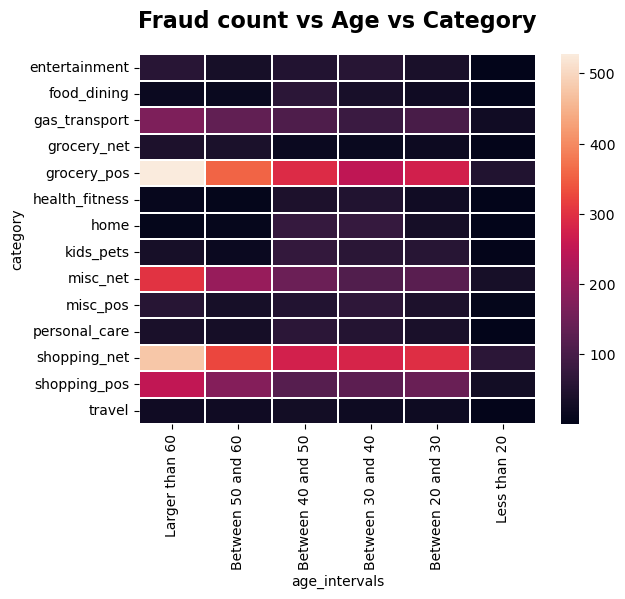

In [64]:
pt=sns.heatmap(pd_crosstab_ordered, cbar=True, linewidths=0.3)
pt.set_title('Fraud count vs Age vs Category', fontsize=16, fontweight='bold', y=1.05)

Text(0.5, 1.05, 'Fraud count vs Transaction_hour vs Category')

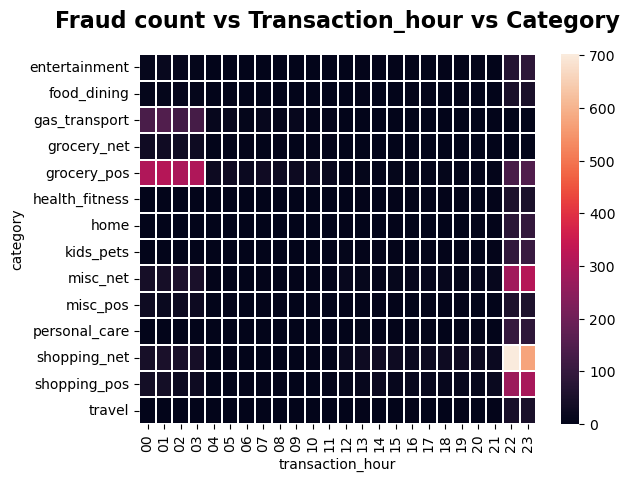

In [65]:
pd_crosstab = pd.crosstab(df_fraud["category"], df_fraud["transaction_hour"])
pd_crosstab
pt=sns.heatmap(pd_crosstab, cbar=True, linewidths=0.3)
pt.set_title('Fraud count vs Transaction_hour vs Category', fontsize=16, fontweight='bold', y=1.05)

Text(0.5, 1.05, 'Fraud count vs Transaction_month vs Category')

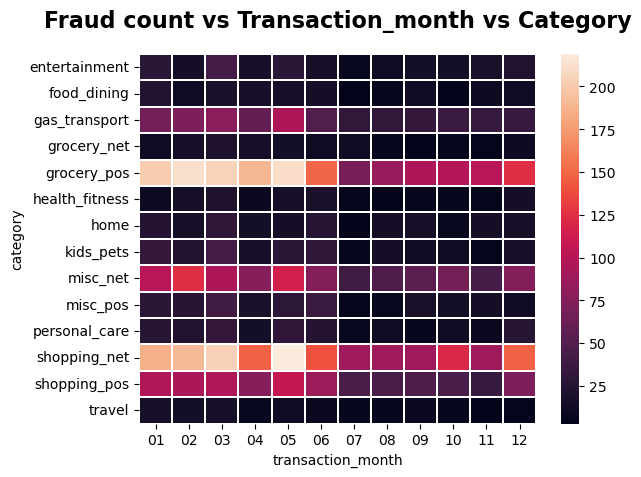

In [66]:
pd_crosstab = pd.crosstab(df_fraud["category"], df_fraud["transaction_month"])
pd_crosstab
pt=sns.heatmap(pd_crosstab, cbar=True, linewidths=0.3)
pt.set_title('Fraud count vs Transaction_month vs Category', fontsize=16, fontweight='bold', y=1.05)

In [67]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'transaction_date',
       'transaction_hour', 'transaction_month', 'transaction_year',
       'birthday_date', 'age', 'age_intervals'],
      dtype='object')

In [68]:
data.cc_num.value_counts()

cc_num
571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: count, Length: 983, dtype: int64

In [69]:
data.merchant.value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [70]:
df_fraud.merchant.value_counts()[0:10]

merchant
fraud_Rau and Sons       49
fraud_Cormier LLC        48
fraud_Kozey-Boehm        48
fraud_Doyle Ltd          47
fraud_Vandervort-Funk    47
fraud_Kilback LLC        47
fraud_Padberg-Welch      44
fraud_Kuhn LLC           44
fraud_Terry-Huel         43
fraud_Koepp-Witting      42
Name: count, dtype: int64

Text(0.5, 1.05, 'Fraud count vs Merchant vs Category')

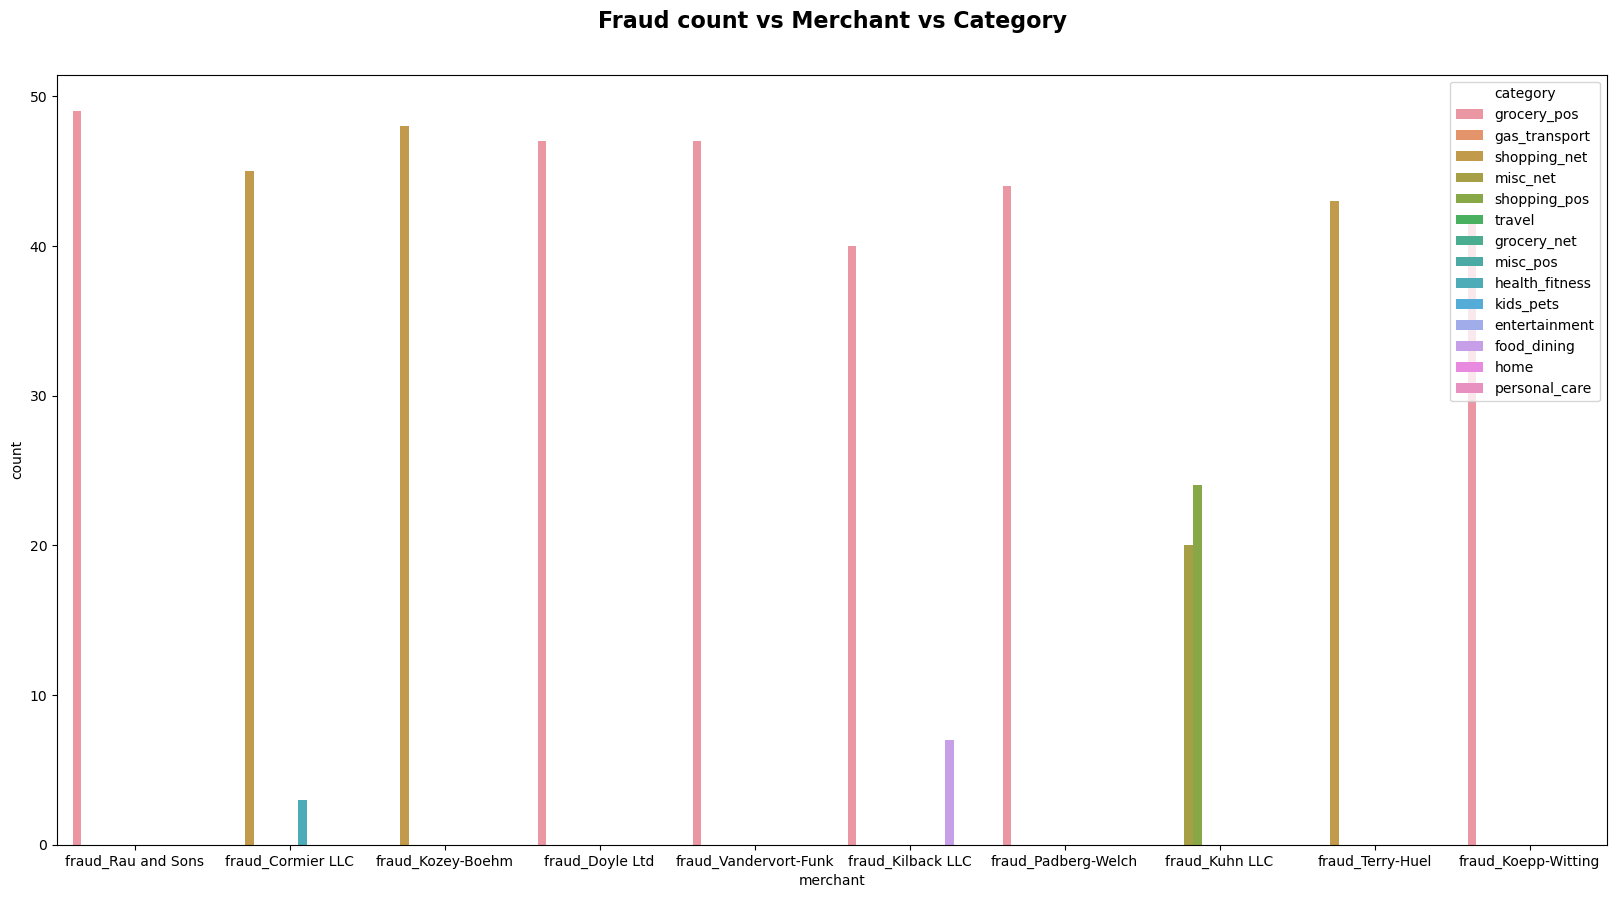

In [71]:
plt.figure(figsize=(20,10))
pt=sns.countplot(data=df_fraud,x='merchant',hue='category',order=df_fraud.merchant.value_counts(sort=True,ascending=False).index[0:10])
pt.set_title('Fraud count vs Merchant vs Category', fontsize=16, fontweight='bold', y=1.05)

Text(0.5, 1.05, 'Fraud count vs Merchant vs Gender')

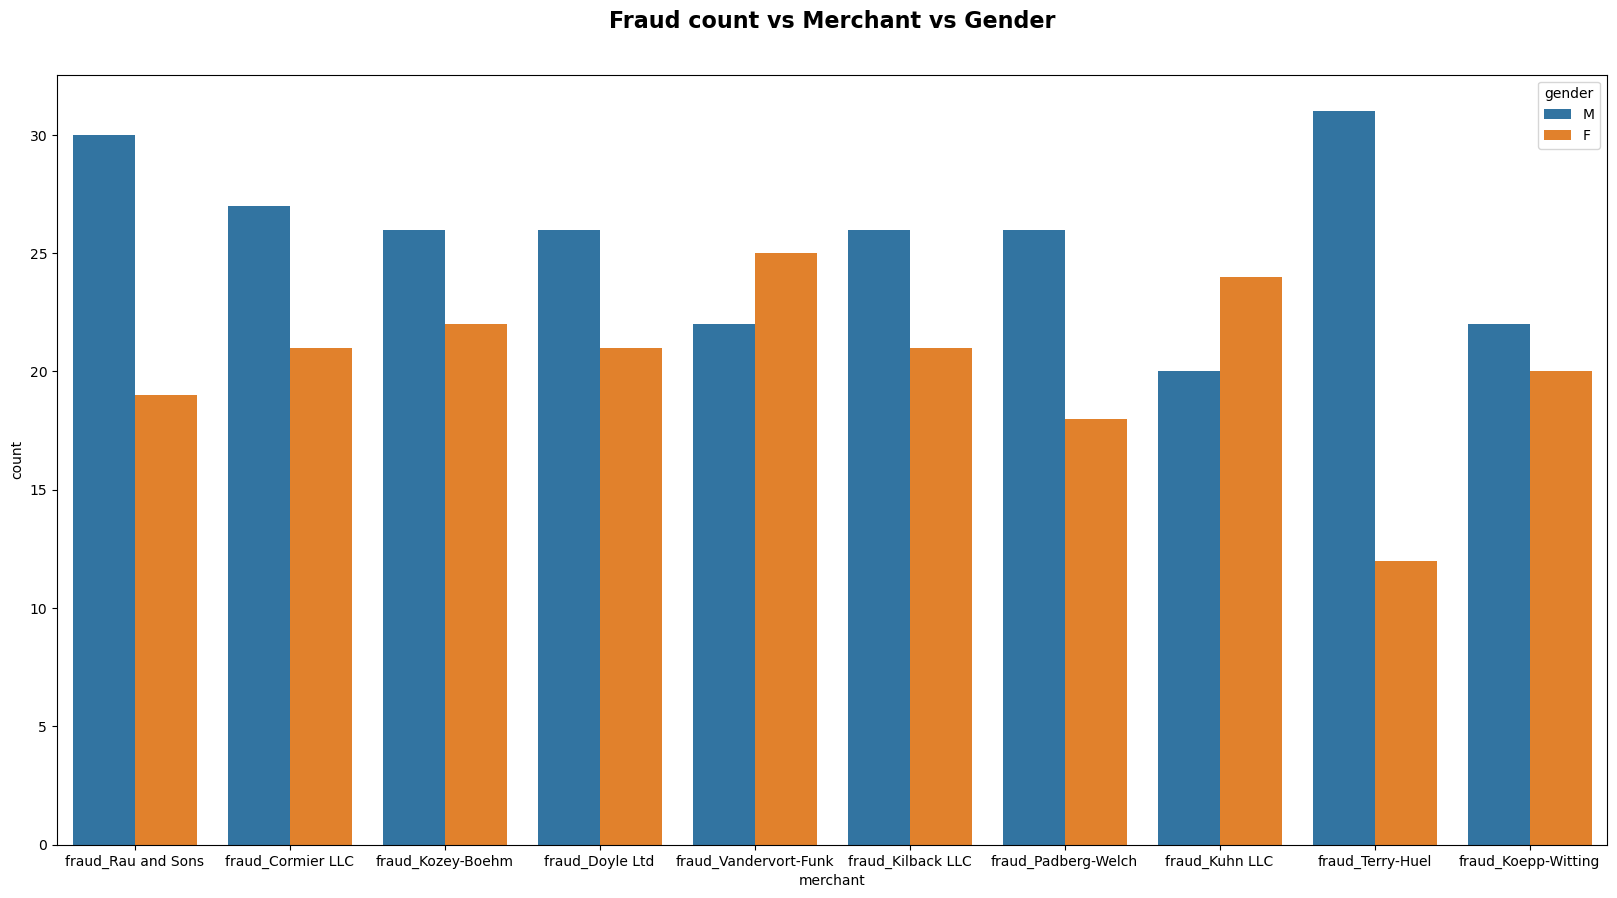

In [72]:
plt.figure(figsize=(20,10))
pt=sns.countplot(data=df_fraud,x='merchant',hue='gender',order=df_fraud.merchant.value_counts(sort=True,ascending=False).index[0:10])
pt.set_title('Fraud count vs Merchant vs Gender', fontsize=16, fontweight='bold', y=1.05)

<Axes: xlabel='merch_long', ylabel='Count'>

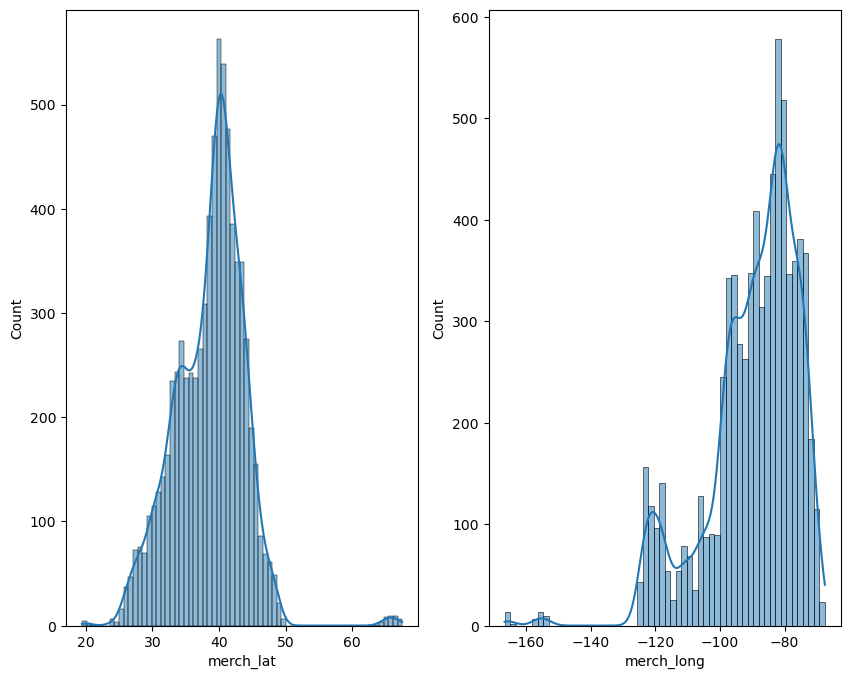

In [73]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2 , 1) 
sns.histplot(df_fraud['merch_lat'],kde=True)
plt.subplot(1, 2 , 2)
sns.histplot(df_fraud['merch_long'],kde=True)

<Axes: xlabel='long', ylabel='Count'>

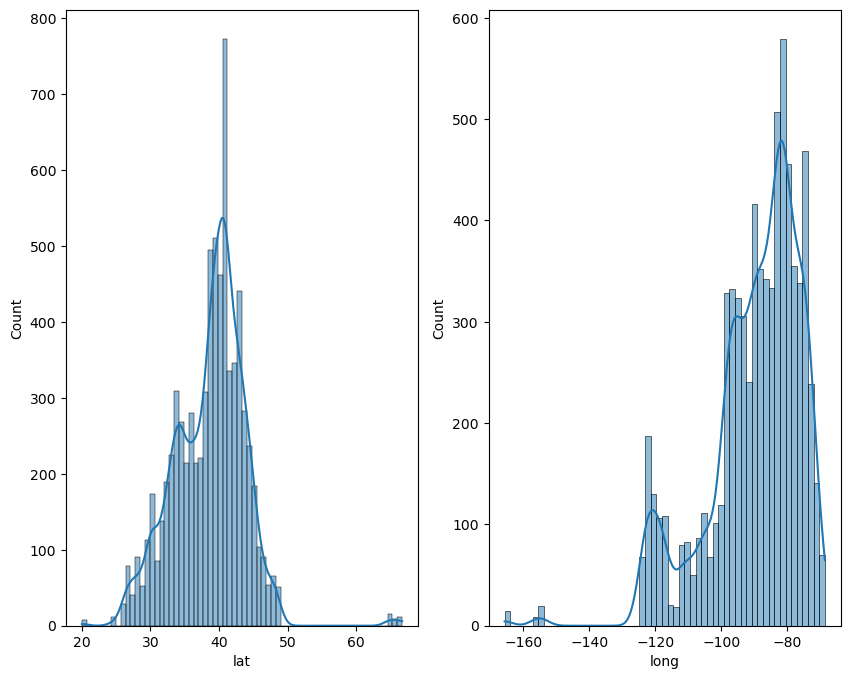

In [74]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2 , 1) 
sns.histplot(df_fraud['lat'],kde=True)
plt.subplot(1, 2 , 2)
sns.histplot(df_fraud['long'],kde=True)

Text(0.5, 1.05, 'Jobs')

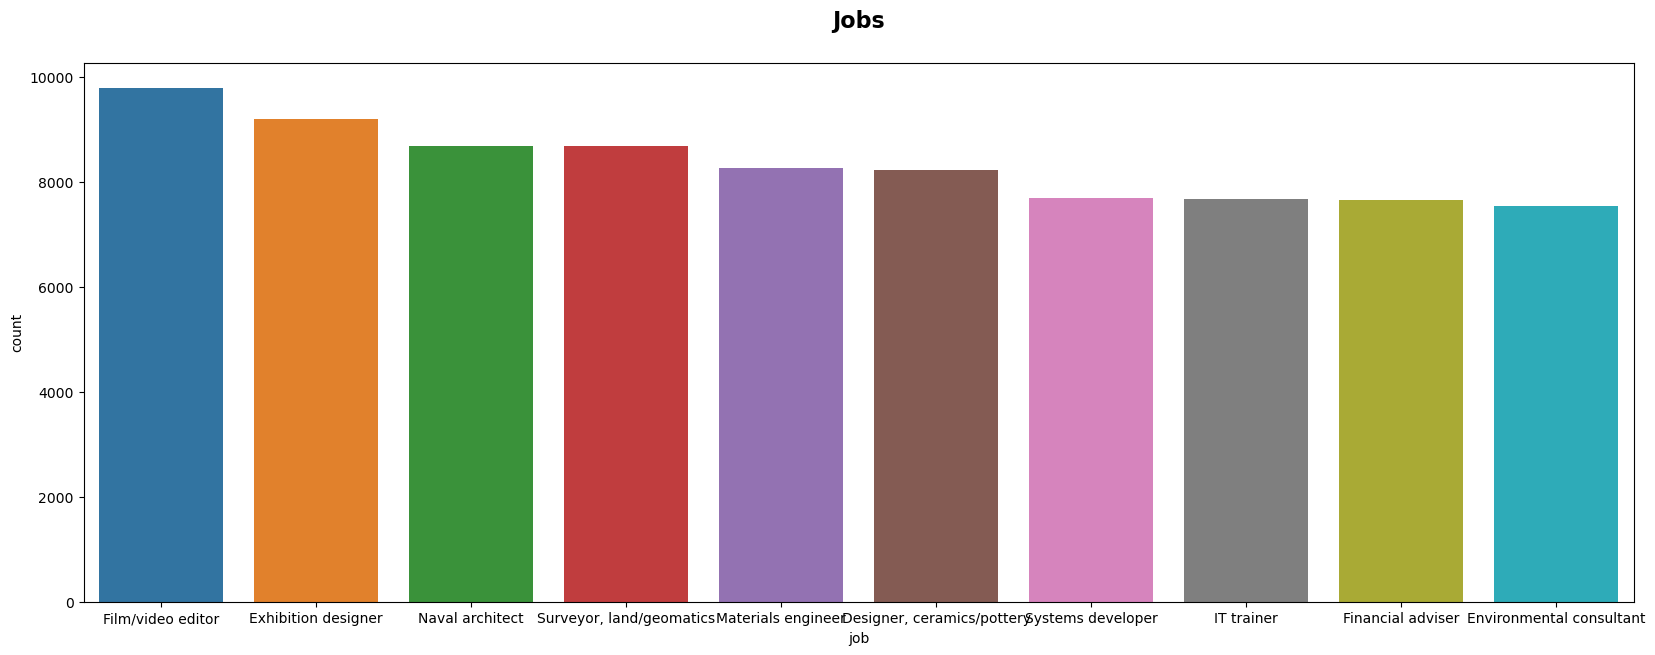

In [75]:
plt.figure(figsize=(20,7))
pt=sns.countplot(data=data,x='job',order=data.job.value_counts(sort=True,ascending=False).index[0:10])
pt.set_title('Jobs', fontsize=16, fontweight='bold', y=1.05)

Text(0.5, 1.05, 'Jobs vs Fraud')

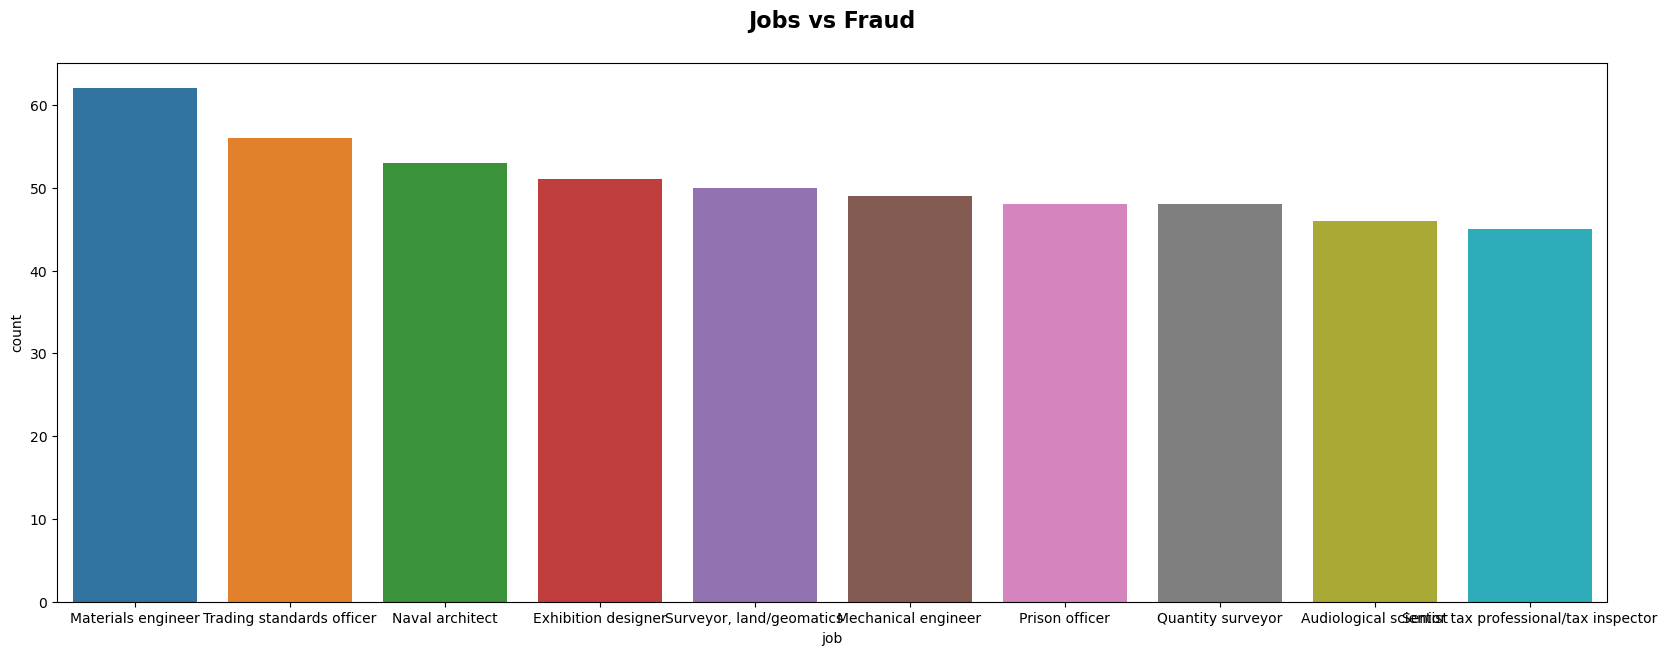

In [76]:
plt.figure(figsize=(20,7))
pt=sns.countplot(data=df_fraud,x='job',order=df_fraud.job.value_counts(sort=True,ascending=False).index[0:10])
pt.set_title('Jobs vs Fraud', fontsize=16, fontweight='bold', y=1.05)

In [77]:
print(data.job.value_counts())

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64


In [78]:
corr_point=data[['amt', 'zip', 'merch_lat','merch_long','lat','long']].corrwith(data['is_fraud'].astype('float'), method=stats.pointbiserialr)

<IPython.core.display.Javascript object>

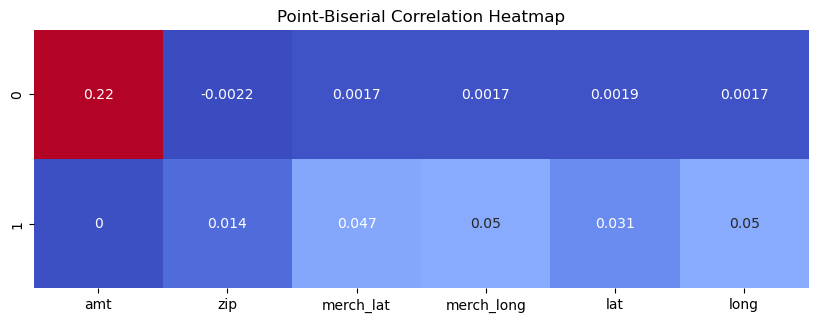

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_point, annot=True, cmap='coolwarm', cbar=False, square=True)
plt.title('Point-Biserial Correlation Heatmap')
plt.show()

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [81]:
col_to_drop=['Unnamed: 0','trans_date_trans_time','cc_num','first', 'last','state','city_pop','dob','trans_num','unix_time','is_fraud','age_intervals']
X = data.drop(columns=col_to_drop,axis=True)

In [82]:
y = data['is_fraud']

In [83]:
X.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'zip', 'lat',
       'long', 'job', 'merch_lat', 'merch_long', 'transaction_date',
       'transaction_hour', 'transaction_month', 'transaction_year',
       'birthday_date', 'age'],
      dtype='object')

In [84]:
print(X.shape)
print(y.shape)

(1296675, 18)
(1296675,)


In [85]:
X.head(5)

,merchant,category,amt,gender,street,city,zip,lat,long,job,merch_lat,merch_long,transaction_date,transaction_hour,transaction_month,transaction_year,birthday_date,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,28654,36.0788,-81.1781,"Psychologist, counselling",36.011293,-82.048315,2019-01-01,00,01,2019,1988-03-09,30
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,99160,48.8878,-118.2105,Special educational needs teacher,49.159047,-118.186462,2019-01-01,00,01,2019,1978-06-21,40
2,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,83252,42.1808,-112.2620,Nature conservation officer,43.150704,-112.154481,2019-01-01,00,01,2019,1962-01-19,56
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,59632,46.2306,-112.1138,Patent attorney,47.034331,-112.561071,2019-01-01,00,01,2019,1967-01-12,52
4,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,24433,38.4207,-79.4629,Dance movement psychotherapist,38.674999,-78.632459,2019-01-01,00,01,2019,1986-03-28,32


In [86]:
X.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'zip', 'lat',
       'long', 'job', 'merch_lat', 'merch_long', 'transaction_date',
       'transaction_hour', 'transaction_month', 'transaction_year',
       'birthday_date', 'age'],
      dtype='object')

In [87]:
from category_encoders import CountEncoder

In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
cat_columns_1=['category','merchant','city','street','job']
cat_columns_2=['gender']

In [90]:
num_columns_1=['amt','lat','age','zip']
num_columns_2=['merch_lat','merch_long','long']
num_columns_3=['transaction_hour','transaction_month','transaction_year']

In [91]:
for i in num_columns_3:
    data[i]=data[i].astype(int)

In [92]:
from sklearn.compose import make_column_transformer

In [93]:
passthrough_feat=['birthday_date','transaction_date']

In [94]:
ct=make_column_transformer(
    (CountEncoder(),cat_columns_1),
    (OneHotEncoder(),cat_columns_2),
    (SimpleImputer(strategy='mean'), num_columns_1),
    (SimpleImputer(strategy='median'), num_columns_2),
    (SimpleImputer(strategy='most_frequent'),num_columns_3),
    
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
ct

ColumnTransformer(transformers=[('countencoder',
                                 CountEncoder(combine_min_nan_groups=True),
                                 ['category', 'merchant', 'city', 'street',
                                  'job']),
                                ('onehotencoder', OneHotEncoder(), ['gender']),
                                ('simpleimputer-1', SimpleImputer(),
                                 ['amt', 'lat', 'age', 'zip']),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='median'),
                                 ['merch_lat', 'merch_long', 'long']),
                                ('simpleimputer-3',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['transaction_hour', 'transaction_month',
                                  'transaction_year'])])

In [96]:
transformed_data=ct.fit_transform(X)

In [97]:
cat=ct.named_transformers_['onehotencoder'].get_feature_names_out().tolist()

In [98]:
columns_names=(
   cat_columns_1+cat+num_columns_1+num_columns_2+num_columns_3
)

In [99]:
print(cat_columns_1)
print(cat)
print(num_columns_1)
print(num_columns_2)
print(num_columns_3)

['category', 'merchant', 'city', 'street', 'job']
['gender_F', 'gender_M']
['amt', 'lat', 'age', 'zip']
['merch_lat', 'merch_long', 'long']
['transaction_hour', 'transaction_month', 'transaction_year']


In [100]:
Transformed_data=pd.DataFrame(transformed_data,columns=columns_names)

In [101]:
Transformed_data.head(5)

,category,merchant,city,street,job,gender_F,gender_M,amt,lat,age,zip,merch_lat,merch_long,long,transaction_hour,transaction_month,transaction_year
0,63287,1267,2028,2028,3545,1.0,0.0,4.97,36.0788,30.0,28654.0,36.011293,-82.048315,-81.1781,00,01,2019
1,123638,2503,3545,3030,5099,1.0,0.0,107.23,48.8878,40.0,99160.0,49.159047,-118.186462,-118.2105,00,01,2019
2,94014,1895,503,503,511,0.0,1.0,220.11,42.1808,56.0,83252.0,43.150704,-112.154481,-112.262,00,01,2019
3,131659,2613,493,493,2530,0.0,1.0,45.0,46.2306,52.0,59632.0,47.034331,-112.561071,-112.1138,00,01,2019
4,79655,1592,2017,2017,2017,0.0,1.0,41.96,38.4207,32.0,24433.0,38.674999,-78.632459,-79.4629,00,01,2019


In [102]:
Transformed_data.columns

Index(['category', 'merchant', 'city', 'street', 'job', 'gender_F', 'gender_M',
       'amt', 'lat', 'age', 'zip', 'merch_lat', 'merch_long', 'long',
       'transaction_hour', 'transaction_month', 'transaction_year'],
      dtype='object')

In [103]:
pipelines_model = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())]),
    'Decision Tree': DecisionTreeClassifier(),
    #'Random Forest': RandomForestClassifier()
}

In [104]:
param_grids = {
    'Logistic Regression': {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 5, 10, 15, 20]},
   
}

In [105]:
for name, pipeline in pipelines_model.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(Transformed_data, y)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best CV Score:", grid_search.best_score_)
    
    

Training Logistic Regression...
Best Parameters: {'clf__C': 0.001}
Best CV Score: 0.9936984980816319
Training Decision Tree...
Best Parameters: {'max_depth': 10}
Best CV Score: 0.9983881851659051


In [106]:
pipeline

DecisionTreeClassifier()

In [107]:
from sklearn.pipeline import make_pipeline

In [116]:
pipe=make_pipeline(ct)

In [108]:
from sklearn.metrics import classification_report

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
data.transaction_time = pd.to_datetime(data.trans_date_trans_time )

In [111]:
def convert_datetime_columns(data, datetime_column,dob):
    # Convert datetime column to datetime dtype
    data[datetime_column] = pd.to_datetime(data[datetime_column])

    # Extract date, month, year, and time into separate columns
    data['transaction_date'] = data[datetime_column].dt.strftime('%Y-%m-%d')
    data['transaction_hour'] = data[datetime_column].dt.strftime('%H')
    data['transaction_month'] = data[datetime_column].dt.strftime('%m')
    data['transaction_year']=data[datetime_column].dt.strftime('%Y')
    data[dob] = pd.to_datetime(data.dob)
    data['birthday_date'] = data.dob.dt.strftime('%Y-%m-%d')
    data['age'] = (data[datetime_column] - data.dob)
    data['age']=data['age']/pd.Timedelta('365 days')
    data['age']=data['age'].astype(int)


    # Drop the original datetime column
    data.drop(columns=[datetime_column,dob], inplace=True)

    return data

In [112]:
def drop(data):
    # Convert datetime column to datetime dtype
    data.drop(columns=['Unnamed: 0','cc_num','first', 'last','state','city_pop','trans_num','unix_time'], inplace=True)

    return data

In [113]:
from sklearn.preprocessing import FunctionTransformer

In [114]:
pipeline = Pipeline([
    # Convert datetime columns
    ('convert_datetime', FunctionTransformer(convert_datetime_columns, kw_args={'datetime_column': 'trans_date_trans_time','dob':'dob'})),
    
    # Rename columns
    ('rename_columns', FunctionTransformer(drop)),
    

])

In [117]:
final_pipeline = make_pipeline(
    pipeline,  
    pipe,
)

In [118]:
final_pipeline

Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('convert_datetime',
                                  FunctionTransformer(func=<function convert_datetime_columns at 0x000001BBDDBB91F0>,
                                                      kw_args={'datetime_column': 'trans_date_trans_time',
                                                               'dob': 'dob'})),
                                 ('rename_columns',
                                  FunctionTransformer(func=<function drop at 0x000001BBDDBB9AF0>))])),
                ('pipeline-2',
                 Pipeline(steps=[('columntransformer',
                                  Colu...
                                                                    'merchant',
                                                                    'city',
                                                                    'street',
                                                                    'job']),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(),
                                                                   ['gender']),
                                                                  ('simpleimputer-1',
                                                                   SimpleImputer(),
                                                                   ['amt',
                                                                    'lat',
                                                                    'age',
                                                                    'zip']),
                                                                  ('simpleimputer-2',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['merch_lat',
                                                                    'merch_long',
                                                                    'long']),
                                                                  ('simpleimputer-3',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['transaction_hour',
                                                                    'transaction_month',
                                                                    'transaction_year'])]))]))])

In [119]:
test_data=pd.read_csv('fraudTest.csv')

In [120]:
test_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [121]:
x_test_data=test_data.drop('is_fraud',axis=1)

In [122]:
y_test_data=test_data['is_fraud']

In [123]:
x_test_data.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431


In [124]:
transformed_test_data=final_pipeline.transform(x_test_data)

In [125]:
transformed_test_data=pd.DataFrame(transformed_test_data)

In [126]:
y_pred = grid_search.predict(transformed_test_data)

In [127]:
cm = confusion_matrix(y_test_data, y_pred)

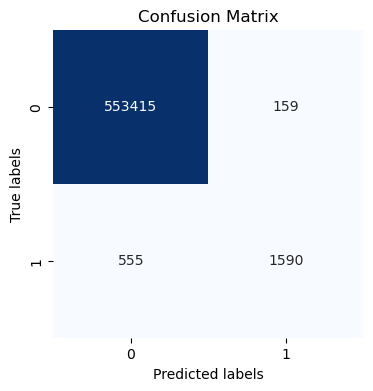

In [128]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [129]:
print("Test Accuracy:", accuracy_score(y_test_data, y_pred))
print("Classification Report:\n", classification_report(y_test_data, y_pred))
print("="*50)

Test Accuracy: 0.9987151779946339
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.91      0.74      0.82      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.87      0.91    555719
weighted avg       1.00      1.00      1.00    555719

